<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/%5B20250319%5D%20Thesis%20Hybrid%20RF-LSTM%20with%20on%20WSN-BFSF_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Training on WSN-BFSF dataset (4 Classes)**

In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 587.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
!pip install -U imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.1 MB/s eta 0:00:00


In [ ]:
#Imports various Python libraries necessary
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils import np_utils
#from keras.utils import np_utils
#from tensorflow.keras import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

In [ ]:
# Load dataset
dataset = pd.read_csv("dataset.csv")

# Preprocessing: Handle missing values (if any)
dataset = dataset.dropna() # Remove missing values

In [ ]:
dataset

,Event,Time,S_Node,Node_id,Rest_Energy,Trace_Level,Mac_Type_Pckt,Source_IP_Port,Des_IP_Port,Packet_Size,TTL,Hop_Count,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num,Class
0,1,0.100000,79,79,600.000000,5,0,79.255,1.255,48,30,1,1,100,0,79,4,0
1,2,0.100963,78,78,599.979723,5,800,79.255,1.255,48,30,1,1,100,0,79,4,0
2,2,0.100963,76,76,599.979722,5,800,79.255,1.255,48,30,1,1,100,0,79,4,0
3,2,0.100964,75,75,599.979722,5,800,79.255,1.255,48,30,1,1,100,0,79,4,0
4,2,0.100964,118,118,599.979722,5,800,79.255,1.255,48,30,1,1,100,0,79,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312101,4,656.526536,140,140,465.332078,5,800,140.255,1.255,48,30,1,31,100,16,140,68,1
312102,4,657.209643,140,140,465.191806,5,800,140.255,1.255,48,30,1,33,100,16,140,72,1
312103,4,657.891729,140,140,465.051737,5,800,140.255,1.255,48,30,1,35,100,16,140,76,1
312104,4,658.574656,140,140,464.911501,5,800,140.255,1.255,48,30,1,37,100,16,140,80,1


In [ ]:
# Encode non-numeric columns (if any)
for column in dataset.columns:
    if dataset[column].dtype == 'object':  # Identify categorical columns
        dataset[column] = LabelEncoder().fit_transform(dataset[column])

# Separate features (X) and target (y)
X = dataset.drop(['Class'], axis=1)  # Assuming 'Class' is the target column
y = dataset['Class']

print("Original Class Distribution:", np.bincount(y))

Original Class Distribution: [262851  11766   7645  29844]


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler # Import StandardScaler here
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Verify the balanced dataset distribution
print("Balanced Class Distribution:", np.bincount(y))

Balanced Class Distribution: [262851 262851 262851 262851]


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, TimeDistributed
from tensorflow.keras.regularizers import l2
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, TimeDistributed
from tensorflow.keras.regularizers import l2
import numpy as np

# Train RF model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Extract features from RF model
train_rf_features = rf_model.predict(X_train)
test_rf_features = rf_model.predict(X_test)

# Reshape RF features for LSTM input - Adding a new axis to create a 2D array before reshaping
train_rf_features = train_rf_features[:, np.newaxis]  # Reshape to (n_samples, 1)
test_rf_features = test_rf_features[:, np.newaxis]    # Reshape to (n_samples, 1)

# Reshape for LSTM input - Using the correct shape for 3D input
train_rf_features = np.reshape(train_rf_features, (train_rf_features.shape[0], 1, train_rf_features.shape[1]))
test_rf_features = np.reshape(test_rf_features, (test_rf_features.shape[0], 1, test_rf_features.shape[1]))

In [ ]:
# prompt: Display the value of an accuracy, precision, recall, F1-Score, AUC-ROC, and FPR of the RF model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
# Import the 'auc' function
from sklearn.metrics import auc

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')


# Calculate AUC-ROC
try:
    auc_roc = roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class='ovr')
except ValueError:
    auc_roc = "Not applicable for multi-class classification"


# Calculate FPR
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate FPR for each class
for i in np.unique(y):
  try:
    y_test_bin = (y_test == i).astype(int)
    y_pred_bin = (y_pred == i).astype(int)
    fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_pred_bin)
    roc_auc[i] = auc(fpr[i], tpr[i]) # Now 'auc' is defined and can be used
  except ValueError:
    fpr[i] = 'Not applicable for multi-class classification'

# Display the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"AUC-ROC: {auc_roc}")
print(f"FPR: {fpr}")

Accuracy: 0.9992819132494138
Precision: 0.999281908221621
Recall: 0.9992819132494138
F1-Score: 0.9992818549947462
AUC-ROC: 0.9999854808996612
FPR: {np.int64(0): array([0.00000000e+00, 2.02902778e-04, 1.00000000e+00]), np.int64(1): array([0.00000000e+00, 3.10694879e-04, 1.00000000e+00]), np.int64(2): array([0.00000000e+00, 2.28265625e-04, 1.00000000e+00]), np.int64(3): array([0.00000000e+00, 2.15585568e-04, 1.00000000e+00])}


In [ ]:
# Train LSTM model with RF features
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(1, train_rf_features.shape[2]), return_sequences=True, kernel_regularizer=l2(0.0001)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(32, return_sequences=True, kernel_regularizer=l2(0.0001)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(16, kernel_regularizer=l2(0.0001)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(4, activation='softmax'))

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Convert y_train and y_test to one-hot encoded format
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=4)  # Assuming you have 4 classes
y_test = to_categorical(y_test, num_classes=4)
history = lstm_model.fit(train_rf_features, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Evaluate hybrid model on test set
test_lstm_features = lstm_model.predict(test_rf_features)
test_rf_lstm_predictions = np.argmax(test_lstm_features, axis=1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10515/10515 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - accuracy: 0.9504 - loss: 0.1375 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 2/100
10515/10515 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.9999 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 3/100
10515/10515 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9999 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 4/100
10515/10515 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.9999 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 5/100
10515/10515 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.9999 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 6/100
10515/10515 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.9999 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 7/100
10515/10515 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.9999 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/100
10515/10515 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.99

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
# Calculate evaluation metrics
accuracy = accuracy_score(np.argmax(y_test, axis=1), test_rf_lstm_predictions)
recall = recall_score(np.argmax(y_test, axis=1), test_rf_lstm_predictions, average='weighted')
precision = precision_score(np.argmax(y_test, axis=1), test_rf_lstm_predictions, average='weighted')
f1score = f1_score(np.argmax(y_test, axis=1), test_rf_lstm_predictions, average='weighted')
confusion_mat = confusion_matrix(np.argmax(y_test, axis=1), test_rf_lstm_predictions)
classification_rep = classification_report(np.argmax(y_test, axis=1), test_rf_lstm_predictions)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1score)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9992819132494138
Recall: 0.9992819132494138
Precision: 0.999281908221621
F1-Score: 0.9992818549947462
Confusion Matrix:
 [[52558     6     6     0]
 [   24 52517     0    29]
 [    8     0 52557     5]
 [    0    43    30 52498]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     52570
           1       1.00      1.00      1.00     52570
           2       1.00      1.00      1.00     52570
           3       1.00      1.00      1.00     52571

    accuracy                           1.00    210281
   macro avg       1.00      1.00      1.00    210281
weighted avg       1.00      1.00      1.00    210281



In [ ]:
# prompt: Display the model AUC - ROC and FPR

# Calculate AUC-ROC
try:
    y_pred_proba = rf_model.predict_proba(X_test)
    auc_roc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
except ValueError:
    auc_roc = "Not applicable for multi-class classification"

# Calculate FPR, TPR, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in np.unique(y):
  try:
    y_test_bin = (y_test == i).astype(int)
    y_score_bin = y_pred_proba[:, i]  # Probability of belonging to class i
    fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_score_bin)
    roc_auc[i] = auc(fpr[i], tpr[i])
  except ValueError:
    fpr[i] = 'Not applicable for multi-class classification'


# Display the metrics
print(f"AUC-ROC: {auc_roc}")
print(f"FPR: {fpr}")

AUC-ROC: 0.9999854808996612
FPR: {np.int64(0): 'Not applicable for multi-class classification', np.int64(1): 'Not applicable for multi-class classification', np.int64(2): 'Not applicable for multi-class classification', np.int64(3): 'Not applicable for multi-class classification'}


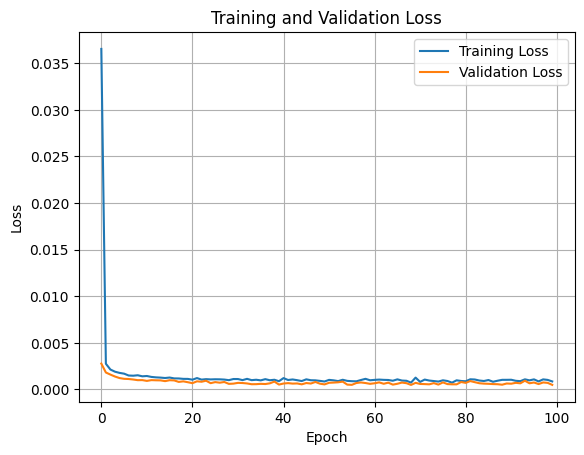

In [ ]:
# prompt: Plot training and validation loss with academic/mathmatically style

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)  # Add grid lines for better readability
plt.show()


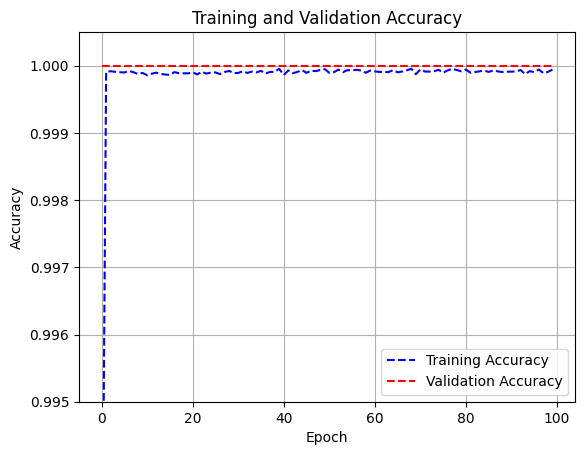

In [ ]:
# prompt: Plot training and validation accuracy with academic/mathmatically style with show y axis from 0.998 to 1

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='--', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.995, 1.0005)  # Set y-axis limits
plt.legend()
plt.grid(True)  # Add grid lines for better readability
plt.show()


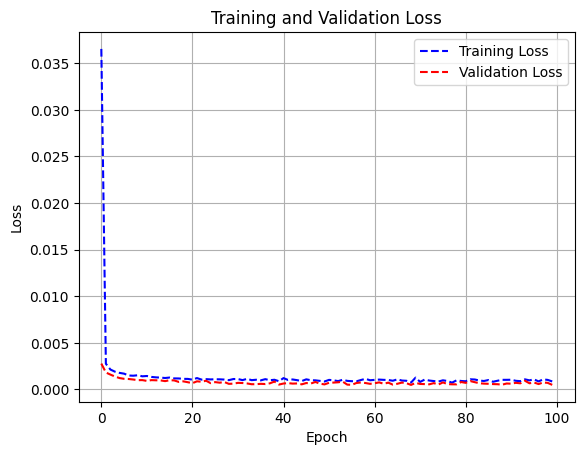

In [ ]:
# prompt: Plot training and validation loss with academic/mathmatically style with red and bule dot line

import matplotlib.pyplot as plt

# Plot training and validation loss with red and blue dotted lines
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


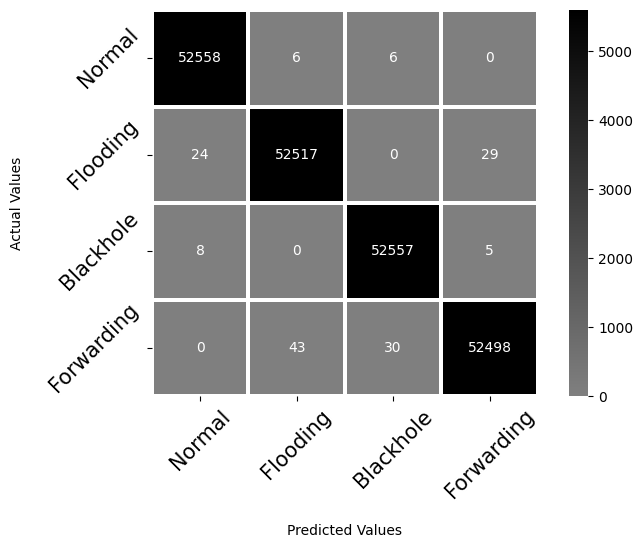

In [ ]:
# prompt: Display confusion matrix in heatmap with inclease text size and include space between each class label

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'confusion_mat' is your confusion matrix variable
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_mat, annot=True, fmt=".0f", cmap="gist_yarg",
                 vmin=0, vmax=5600, center=0, square=True, linewidths=1.5)
sns.set(font_scale=2) #Fixed indentation
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values\n');
ax.xaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
ax.yaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])

# Add space between x-axis labels
plt.xticks(fontsize=15, rotation=45) # Add this line to rotate the x-axis labels by 45 degrees
plt.yticks(fontsize=15, rotation=45) # Add this line to rotate the x-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

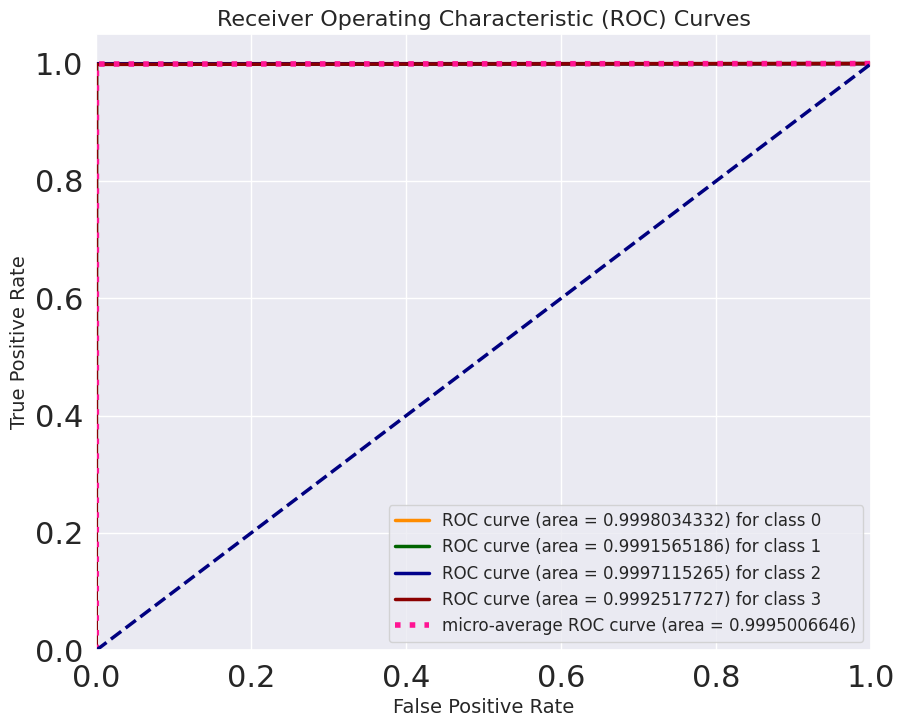

AUC Score for class 0: 0.9998034332299712
AUC Score for class 1: 0.9991565186400578
AUC Score for class 2: 0.999711526499929
AUC Score for class 3: 0.9992517727483308
Micro-average AUC Score: 0.9995006645765994


In [ ]:
# prompt: Display AUC and ROC curves with also show micro avg. with a proper size to show in Thesis

from sklearn.preprocessing import label_binarize

# ... (Your existing code) ...

# Binarize the output - Include all classes present in y_test
# Assuming y_test has values from 0 to 4 (5 classes)
n_classes = 4  # Set the total number of classes to 5
y_test_bin = label_binarize(np.argmax(y_test, axis=1), classes=list(range(n_classes)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], test_lstm_features[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), test_lstm_features.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Plot ROC curves for the multiclass problem
plt.figure(figsize=(10, 8))  # Set figure size for better visualization
lw = 2.5
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.10f) for class 0' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='darkgreen',
         lw=lw, label='ROC curve (area = %0.10f) for class 1' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='darkblue',
         lw=lw, label='ROC curve (area = %0.10f) for class 2' % roc_auc[2])
plt.plot(fpr[3], tpr[3], color='darkred',
         lw=lw, label='ROC curve (area = %0.10f) for class 3' % roc_auc[3])

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.10f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)  # Add grid lines for better readability
plt.show()

# Print AUC scores for each class and the micro average
for i in range(n_classes):
    print(f"AUC Score for class {i}:", roc_auc[i])
print("Micro-average AUC Score:", roc_auc["micro"])

In [ ]:
# prompt: Display detection rates in each class

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming 'confusion_mat' is your confusion matrix from the previous code
# and test_lstm_features and y_test are available

# ... (Your existing code)

# Binarize the output
y_test_bin = label_binarize(np.argmax(y_test, axis=1), classes=[0, 1, 2, 3])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], test_lstm_features[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(f"Detection Rate for Class {i}: {roc_auc[i]}")

Detection Rate for Class 0: 0.9998034332299712
Detection Rate for Class 1: 0.9991565186400578
Detection Rate for Class 2: 0.999711526499929
Detection Rate for Class 3: 0.9992517727483308


In [ ]:
# prompt: Display False Positive Rate (FPR) and True Positive Rate (TPR)

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# ... (Your existing code)

# Binarize the output
y_test_bin = label_binarize(np.argmax(y_test, axis=1), classes=[0, 1, 2, 3])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], test_lstm_features[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Display FPR and TPR for each class
    print(f"Class {i}:")
    print(f"  FPR: {fpr[i]}")
    print(f"  TPR: {tpr[i]}")

# ... (Rest of your code)


Class 0:
  FPR: [0.00000000e+00 2.02902778e-04 3.33470715e-01 1.00000000e+00]
  TPR: [0.         0.99977173 0.99988587 1.        ]
Class 1:
  FPR: [0.00000000e+00 3.10694879e-04 3.17035590e-04 3.33787751e-01
 6.67093608e-01 1.00000000e+00]
  TPR: [0.         0.99899182 0.99899182 0.99899182 0.99944835 1.        ]
Class 2:
  FPR: [0.00000000e+00 0.00000000e+00 2.28265625e-04 3.33534123e-01
 6.66592692e-01 1.00000000e+00]
  TPR: [0.00000000e+00 1.90222560e-05 9.99752711e-01 9.99752711e-01
 9.99847822e-01 1.00000000e+00]
Class 3:
  FPR: [0.00000000e+00 2.15585568e-04 3.33504534e-01 1.00000000e+00]
  TPR: [0.         0.9986114  0.99918206 1.        ]


In [ ]:
# prompt: Display overall FPR and TPR of the model

from sklearn.preprocessing import label_binarize

# ... (Your existing code) ...

# Binarize the output
y_test_bin = label_binarize(np.argmax(y_test, axis=1), classes=[0, 1, 2, 3])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], test_lstm_features[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculate the average FPR and TPR across all classes
# Pad shorter arrays with NaN to make them equal length
max_len = max(len(fpr[i]) for i in fpr if isinstance(fpr[i], np.ndarray))
fpr_padded = [np.pad(fpr[i], (0, max_len - len(fpr[i])), 'constant', constant_values=np.nan) if isinstance(fpr[i], np.ndarray) else np.nan for i in fpr]
tpr_padded = [np.pad(tpr[i], (0, max_len - len(tpr[i])), 'constant', constant_values=np.nan) if isinstance(tpr[i], np.ndarray) else np.nan for i in tpr]

average_fpr = np.nanmean(fpr_padded, axis=0)
average_tpr = np.nanmean(tpr_padded, axis=0)

print(f"Overall Average FPR: {average_fpr}")
print(f"Overall Average TPR: {average_tpr}")

Overall Average FPR: [0.00000000e+00 1.82295806e-04 1.66880138e-01 6.66830468e-01
 6.66843150e-01 1.00000000e+00]
Overall Average TPR: [0.         0.74934849 0.99945311 0.99968613 0.99964809 1.        ]
